In [9]:
!pip install tensorflow matplotlib --quiet
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
import zipfile
import os

In [3]:
# Replace with your actual file name
zip_filename = "archive.zip"
# Extract to /content
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Check if folders are extracted
os.listdir("/content")


['.config', 'test', 'archive.zip', 'train', 'sample_data']

In [5]:
def show_sample_images(base_dir, category, n=5):
    path = os.path.join(base_dir, category)
    images = random.sample(os.listdir(path), n)
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(path, img_name))
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

📸 Good Apples:


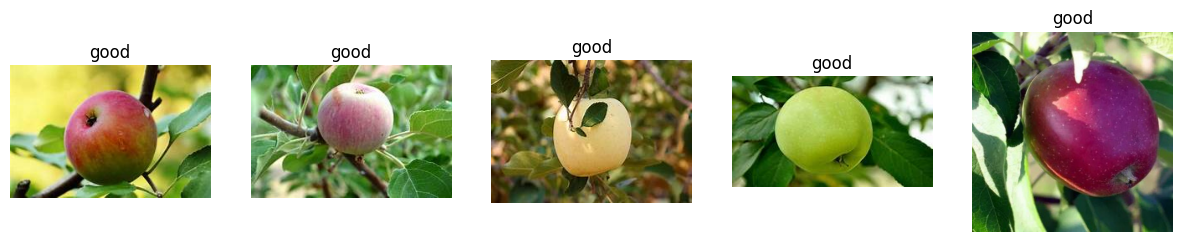

📸 Bad Apples:


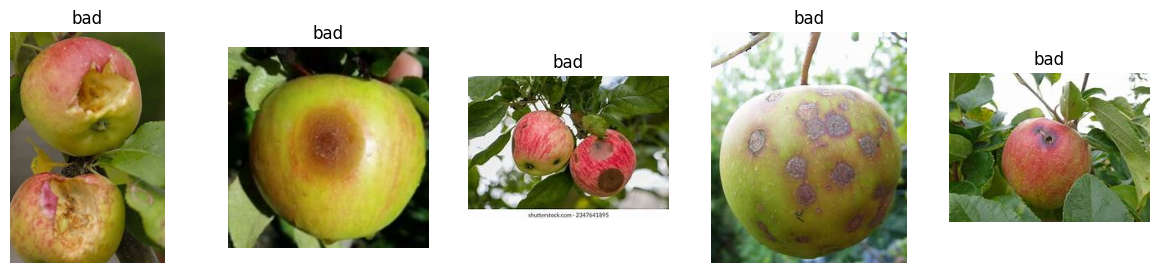

In [7]:
print("📸 Good Apples:")
show_sample_images('/content/train', 'good')

print("📸 Bad Apples:")
show_sample_images('/content/train', 'bad')

In [10]:
img_size = 224
batch_size = 32

# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    '/content/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(img_size, img_size, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=test_gen, epochs=10)


Found 50 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.5104 - loss: 0.9461 - val_accuracy: 0.5000 - val_loss: 0.8280
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.4948 - loss: 0.8900 - val_accuracy: 0.5000 - val_loss: 0.8086
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5319 - loss: 0.8284 - val_accuracy: 0.5500 - val_loss: 0.7915
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.4363 - loss: 0.9613 - val_accuracy: 0.5750 - val_loss: 0.7749
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5637 - loss: 0.7909 - val_accuracy: 0.5750 - val_loss: 0.7601
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4838 - loss: 0.8389 - val_accuracy: 0.5750 - val_loss: 0.7468
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5533 - loss: 0.7816 - val_accuracy: 0.6000 - val_loss: 0.7337
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5000 - loss: 0.7794 - val_accuracy: 0.6000 - val_loss: 0.7217
Epoch 9/10
2/2 

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.5396 - loss: 0.7292
✅ Test Accuracy: 57.50%


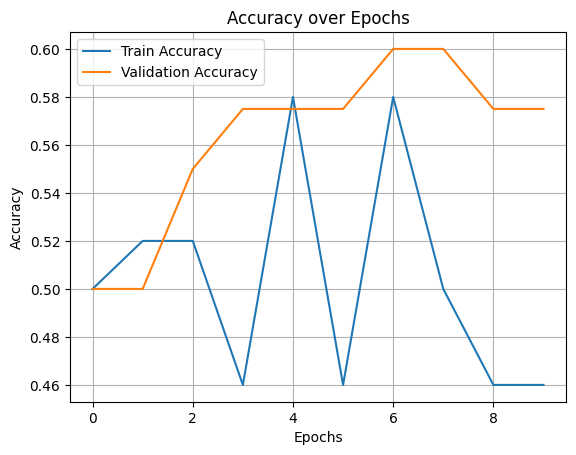

In [11]:
loss, accuracy = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Improving Model

In [12]:
history = model.fit(train_gen, validation_data=test_gen, epochs=30)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4288 - loss: 0.7695 - val_accuracy: 0.6250 - val_loss: 0.6910
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4821 - loss: 0.8317 - val_accuracy: 0.6250 - val_loss: 0.6826
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5267 - loss: 0.8079 - val_accuracy: 0.6250 - val_loss: 0.6752
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5979 - loss: 0.7680 - val_accuracy: 0.6250 - val_loss: 0.6686
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.5400 - loss: 0.7920 - val_accuracy: 0.6250 - val_loss: 0.6622
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5713 - loss: 0.7113 - val_accuracy: 0.6250 - val_loss: 0.6565
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5481 - loss: 0.7935 - val_accuracy: 0.6250 - val_loss: 0.6509
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.6674 - loss: 0.6402 - val_accuracy: 0.6500 - val_loss: 0.6460
Epoch 9/30
2/2 

In [13]:
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze most layers
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=test_gen, epochs=10)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.6037 - loss: 0.6367 - val_accuracy: 0.7250 - val_loss: 0.5914
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5208 - loss: 0.6371 - val_accuracy: 0.7250 - val_loss: 0.5877
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7092 - loss: 0.6098 - val_accuracy: 0.7250 - val_loss: 0.5833
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6796 - loss: 0.5782 - val_accuracy: 0.7250 - val_loss: 0.5793
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.7156 - loss: 0.5419 - val_accuracy: 0.7250 - val_loss: 0.5757
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.6837 - loss: 0.5969 - val_accuracy: 0.7250 - val_loss: 0.5719
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7300 - loss: 0.5250 - val_accuracy: 0.7250 - val_loss: 0.5686
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.8413 - loss: 0.4143 - val_accuracy: 0.7250 - val_loss: 0.5653
Epoch 9/10
2/2 

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.7021 - loss: 0.5729
✅ Test Accuracy: 72.50%


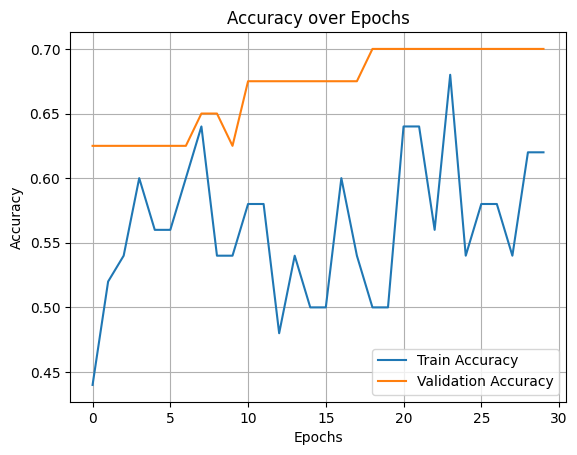

In [14]:
loss, accuracy = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()